In [106]:
import pandas as pd

In [226]:
import numpy as np

In [107]:
playerplays = pd.read_csv("player_play.csv")
plays = pd.read_csv("plays.csv")

In [108]:
df = pd.read_csv("tracking_week_1.csv")

In [109]:
motionplayers = playerplays[['gameId','playId','motionSinceLineset']][playerplays['motionSinceLineset']==True]

In [110]:
motionplays = pd.merge(
    motionplayers,
    plays[['gameId','playId','passResult']],
    how = "left",
    on = ['gameId','playId']
)

In [111]:
motionplays = motionplays[motionplays['passResult'].notna()]

In [112]:
routeRunners = pd.merge(
    playerplays[['gameId','playId','nflId','motionSinceLineset','inMotionAtBallSnap','wasRunningRoute','wasTargettedReceiver']][playerplays['wasRunningRoute']==True],
    plays[['gameId','playId','down','yardsToGo','offenseFormation','receiverAlignment','pff_passCoverage','absoluteYardlineNumber',]],
    how = "left",
    left_on = ['gameId','playId'],
    right_on = ['gameId','playId']
)


In [113]:
motionRunners = routeRunners.merge(
    motionplays[['gameId', 'playId']].drop_duplicates(), 
    on=['gameId', 'playId'], 
    how='inner'
)

In [114]:
snappositions = df[['gameId','playId','nflId','y']][df['frameType']=="SNAP"]

In [115]:
snappositions

,gameId,playId,nflId,y
113,2022091200,64,35459.0,29.43
276,2022091200,64,39987.0,23.86
439,2022091200,64,41310.0,22.21
602,2022091200,64,42393.0,13.41
765,2022091200,64,42403.0,17.63
...,...,...,...,...
7103946,2022090800,3696,53678.0,44.13
7104121,2022090800,3696,54488.0,44.36
7104296,2022090800,3696,54554.0,35.23
7104471,2022090800,3696,54650.0,7.14


In [116]:
motionRunners = pd.merge(
    motionRunners,
    snappositions,
    how = "left",
    on = ['gameId','playId','nflId']
)

In [117]:
motionRunners

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
0,2022090800,56,42489,True,False,1.0,1,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65
1,2022090800,56,44985,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,18.20
2,2022090800,56,47879,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,34.37
3,2022090800,56,52536,False,False,1.0,0,1,10,SHOTGUN,2x2,Cover 6-Left,85,8.25
4,2022090800,212,42818,False,False,1.0,0,2,9,SHOTGUN,2x2,Cover-1,44,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,2022110700,2496,54476,False,False,1.0,1,3,6,SHOTGUN,2x2,Cover-6 Right,51,NaN
16432,2022110700,3059,43415,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN
16433,2022110700,3059,52500,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN
16434,2022110700,3059,52609,False,False,1.0,0,3,14,SHOTGUN,3x1,Cover-0,33,NaN


In [118]:
weekone = motionRunners[motionRunners['y'].notna()]

In [99]:
weekone[weekone['motionSinceLineset'].isna()]

,gameId,playId,nflId,motionSinceLineset,inMotionAtBallSnap,wasRunningRoute,wasTargettedReceiver,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,y
1913,2022091110,673,40011,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,32.52
1914,2022091110,673,47839,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,26.99
1916,2022091110,673,53591,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,31.20
1917,2022091110,673,54519,NaN,NaN,1.0,0,1,3,I_FORM,2x1,Cover-1,13,14.57
2097,2022091111,232,40024,NaN,False,1.0,0,1,10,SINGLEBACK,3x1,Cover-2,84,22.91
2098,2022091111,232,44819,NaN,False,1.0,0,1,10,SINGLEBACK,3x1,Cover-2,84,37.92


In [119]:
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)

C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\1285583402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)
C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\1285583402.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekone['motionSinceLineset'] = weekone['motionSinceLineset'].fillna(False)


In [120]:
one = pd.DataFrame(columns = ['gameId','playId','down','yardsToGo','offenseFormation','receiverAlignment','pff_passCoverage','absoluteYardlineNumber','firstY','secondY','thirdY','fourthY','fifthY', 'sixthY', 'motionReciever','motionCluster','inMotionAtBallSnap','targettedReceiver','maxSeparationReceiver'])
for _, i in weekone.iterrows():
    inone = ((one['gameId'] == i['gameId']) & (one['playId'] == i['playId'])).any()
    
    if not inone:
        play = weekone[(weekone['gameId'] == i['gameId']) & 
                           (weekone['playId'] == i['playId'])]
        
        thisplay = []
        thisplay.extend([
            i['gameId'],
            i['playId'],
            i['down'], 
            i['yardsToGo'], 
            i['offenseFormation'], 
            i['receiverAlignment'], 
            i['pff_passCoverage'], 
            i['absoluteYardlineNumber']
        ])
        motionrec = 0
        targetrec = 0
        motionindex = 1
        targetindex = 1
        #motionRecMax = False
        #max = 0
        moving = False
        for _, j in play.iterrows():
        #    if j['maxValueOfSeparation'] > max:
        #        max = j['maxValueOfSeparation']
        #        motionRecMax = j['motionSinceLineset']
            thisplay.append(j['y'])
            if j['motionSinceLineset']:
                motionrec = motionindex
                if j['inMotionAtBallSnap']:
                    moving = True
            if j['wasTargettedReceiver']:
                targetrec = targetindex
            motionindex += 1
            targetindex += 1
        while len(thisplay) < 14:
            thisplay.append(0)
        thisplay.extend([
            motionrec,
            0,  #add motion cluster
            moving,
            targetrec,
            0  #find max separation receiver
        ])
        new_row = pd.DataFrame([thisplay], columns=one.columns)
        one = pd.concat([one, new_row], ignore_index=True)

C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\57200053.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one = pd.concat([one, new_row], ignore_index=True)


In [121]:
one

,gameId,playId,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,firstY,secondY,thirdY,fourthY,fifthY,sixthY,motionReciever,motionCluster,inMotionAtBallSnap,targettedReceiver,maxSeparationReceiver
0,2022090800,56,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65,18.20,34.37,8.25,0,0,1,0,False,1,0
1,2022090800,212,2,9,SHOTGUN,2x2,Cover-1,44,8.24,17.48,32.83,31.75,43.24,0,3,0,True,4,0
2,2022090800,236,3,1,I_FORM,2x1,Cover-3,36,29.50,35.27,29.37,0.00,0,0,2,0,True,2,0
3,2022090800,364,3,8,SHOTGUN,3x1,Cover 6-Left,29,44.53,19.36,14.66,31.45,21.99,0,3,0,False,3,0
4,2022090800,438,1,10,SINGLEBACK,2x2,Cover-2,63,35.72,18.82,30.07,23.97,19.88,0,5,0,True,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022091200,3296,3,3,SHOTGUN,2x2,Red Zone,19,9.12,39.03,17.91,37.56,32.39,0,2,0,True,5,0
608,2022091200,3382,2,8,SHOTGUN,2x2,Red Zone,18,33.27,18.35,9.71,37.49,32.42,0,1,0,True,2,0
609,2022091200,3491,2,8,SHOTGUN,3x1,Quarters,42,32.13,36.47,27.25,19.06,43.83,0,3,0,True,4,0
610,2022091200,3596,3,5,SHOTGUN,2x2,Cover-3,83,15.52,16.78,44.85,31.66,0,0,2,0,True,4,0


In [124]:
one = pd.DataFrame(columns=[
    'gameId', 'playId', 'down', 'yardsToGo', 'offenseFormation', 
    'receiverAlignment', 'pff_passCoverage', 'absoluteYardlineNumber',
    'firstY', 'secondY', 'thirdY', 'fourthY', 'fifthY', 'sixthY', 
    'motionReceiver', 'motionCluster', 'inMotionAtBallSnap', 
    'targetedReceiver', 'maxSeparationReceiver', 'nflId'
])

for _, i in weekone.iterrows():
    inone = ((one['gameId'] == i['gameId']) & (one['playId'] == i['playId'])).any()
    
    if not inone:
        play = weekone[(weekone['gameId'] == i['gameId']) & 
                       (weekone['playId'] == i['playId'])]
        motion_players = play[play['motionSinceLineset']]  # Get motion players

        for _, motion_player in motion_players.iterrows():
            thisplay = [
                i['gameId'],
                i['playId'],
                i['down'], 
                i['yardsToGo'], 
                i['offenseFormation'], 
                i['receiverAlignment'], 
                i['pff_passCoverage'], 
                i['absoluteYardlineNumber']
            ]

            motionrec = 0
            targetrec = 0
            motionindex = 1
            targetindex = 1
            moving = False
            for _, j in play.iterrows():
                thisplay.append(j['y'])
                if j['motionSinceLineset']:
                    if j['nflId'] == motion_player['nflId']:  # Focus on specific motion player
                        motionrec = motionindex
                        if j['inMotionAtBallSnap']:
                            moving = True
                if j['wasTargettedReceiver']:
                    targetrec = targetindex
                motionindex += 1
                targetindex += 1

            while len(thisplay) < 14:
                thisplay.append(0)

            thisplay.extend([
                motionrec,
                0,  # Add motion cluster
                moving,
                targetrec,
                0,  # Find max separation receiver
                motion_player['nflId']
            ])
            
            new_row = pd.DataFrame([thisplay], columns=one.columns)
            one = pd.concat([one, new_row], ignore_index=True)


C:\Users\bhaga\AppData\Local\Temp\ipykernel_29716\2826838086.py:59: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  one = pd.concat([one, new_row], ignore_index=True)


In [131]:
one

,gameId,playId,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,firstY,secondY,thirdY,fourthY,fifthY,sixthY,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId
0,2022090800,56,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65,18.20,34.37,8.25,0,0,1,0,False,1,0,42489
1,2022090800,212,2,9,SHOTGUN,2x2,Cover-1,44,8.24,17.48,32.83,31.75,43.24,0,3,0,True,4,0,47879
2,2022090800,236,3,1,I_FORM,2x1,Cover-3,36,29.50,35.27,29.37,0.00,0,0,2,0,True,2,0,52536
3,2022090800,364,3,8,SHOTGUN,3x1,Cover 6-Left,29,44.53,19.36,14.66,31.45,21.99,0,3,0,False,3,0,44881
4,2022090800,438,1,10,SINGLEBACK,2x2,Cover-2,63,35.72,18.82,30.07,23.97,19.88,0,5,0,True,5,0,53678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022091200,3296,3,3,SHOTGUN,2x2,Red Zone,19,9.12,39.03,17.91,37.56,32.39,0,2,0,True,5,0,52423
685,2022091200,3382,2,8,SHOTGUN,2x2,Red Zone,18,33.27,18.35,9.71,37.49,32.42,0,1,0,True,2,0,46109
686,2022091200,3491,2,8,SHOTGUN,3x1,Quarters,42,32.13,36.47,27.25,19.06,43.83,0,3,0,True,4,0,46096
687,2022091200,3596,3,5,SHOTGUN,2x2,Cover-3,83,15.52,16.78,44.85,31.66,0,0,2,0,True,4,0,52423


In [155]:
clusters = pd.read_csv('clusters.csv')

In [156]:
clusters[['gameId','playId','nflId','cluster']]

,gameId,playId,nflId,cluster
0,2022090800,56,42489.0,3.0
1,2022090800,80,47857.0,6.0
2,2022090800,212,47879.0,0.0
3,2022090800,236,52536.0,3.0
4,2022090800,299,44881.0,1.0
...,...,...,...,...
1134,2022091200,3382,46109.0,3.0
1135,2022091200,3491,46096.0,2.0
1136,2022091200,3553,52423.0,3.0
1137,2022091200,3596,52423.0,5.0


In [157]:
week_one = pd.merge(
    one,
    clusters[['gameId','playId','nflId','cluster']],
    how = "left",
    on = ['gameId','playId', 'nflId']
)

In [158]:
week_one['motionCluster'] = week_one['cluster']

In [159]:
week_one[week_one['motionCluster'].isna()]

,gameId,playId,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,firstY,secondY,...,fourthY,fifthY,sixthY,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver,nflId,cluster
9,2022090800,721,2,7,SHOTGUN,2x2,Cover-3,39,18.39,46.86,...,8.66,0,0,2,NaN,False,2,0,44985,NaN
15,2022090800,1102,2,6,SHOTGUN,3x1,Quarters,85,20.94,15.43,...,33.43,10.45,0,4,NaN,False,4,0,52494,NaN
19,2022090800,1286,1,10,SINGLEBACK,2x2,Cover-2,46,32.75,28.78,...,0.00,0,0,3,NaN,True,2,0,53486,NaN
21,2022090800,1334,3,14,EMPTY,3x2,Cover-3,50,8.60,29.42,...,17.88,34.62,0,4,NaN,False,1,0,47853,NaN
32,2022090800,2572,2,9,SHOTGUN,2x2,Cover-3 Seam,76,36.45,18.69,...,43.19,14.49,0,5,NaN,True,3,0,53079,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,2022091200,286,2,10,I_FORM,2x1,Cover-6 Right,99,14.78,21.93,...,23.84,0,0,2,NaN,True,2,0,48096,NaN
648,2022091200,346,2,1,SINGLEBACK,2x2,Cover-6 Right,65,38.12,35.07,...,0.00,0,0,2,NaN,False,2,0,48096,NaN
663,2022091200,1521,1,10,SINGLEBACK,2x2,Cover-6 Right,57,16.43,23.69,...,32.00,19.15,0,5,NaN,False,5,0,52541,NaN
672,2022091200,2591,1,10,SHOTGUN,3x1,Cover 6-Left,78,18.48,43.01,...,14.59,27.24,0,1,NaN,False,2,0,44987,NaN


In [160]:
week_one = week_one.drop(columns = ['cluster', 'nflId'])

In [164]:
week_one = week_one.dropna(subset=['motionCluster'])

In [165]:
week_one

,gameId,playId,down,yardsToGo,offenseFormation,receiverAlignment,pff_passCoverage,absoluteYardlineNumber,firstY,secondY,thirdY,fourthY,fifthY,sixthY,motionReceiver,motionCluster,inMotionAtBallSnap,targetedReceiver,maxSeparationReceiver
0,2022090800,56,1,10,SHOTGUN,2x2,Cover 6-Left,85,43.65,18.20,34.37,8.25,0,0,1,3.0,False,1,0
1,2022090800,212,2,9,SHOTGUN,2x2,Cover-1,44,8.24,17.48,32.83,31.75,43.24,0,3,0.0,True,4,0
2,2022090800,236,3,1,I_FORM,2x1,Cover-3,36,29.50,35.27,29.37,0.00,0,0,2,3.0,True,2,0
3,2022090800,364,3,8,SHOTGUN,3x1,Cover 6-Left,29,44.53,19.36,14.66,31.45,21.99,0,3,2.0,False,3,0
4,2022090800,438,1,10,SINGLEBACK,2x2,Cover-2,63,35.72,18.82,30.07,23.97,19.88,0,5,1.0,True,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,2022091200,3296,3,3,SHOTGUN,2x2,Red Zone,19,9.12,39.03,17.91,37.56,32.39,0,2,5.0,True,5,0
685,2022091200,3382,2,8,SHOTGUN,2x2,Red Zone,18,33.27,18.35,9.71,37.49,32.42,0,1,3.0,True,2,0
686,2022091200,3491,2,8,SHOTGUN,3x1,Quarters,42,32.13,36.47,27.25,19.06,43.83,0,3,2.0,True,4,0
687,2022091200,3596,3,5,SHOTGUN,2x2,Cover-3,83,15.52,16.78,44.85,31.66,0,0,2,5.0,True,4,0


In [277]:
week_one = week_one[week_one['targetedReceiver']!=0]

Modeling

In [280]:
X = week_one.drop(columns=['gameId','playId','targetedReceiver','maxSeparationReceiver'])

In [284]:
y = week_one['targetedReceiver']

In [282]:
X = pd.get_dummies(X, columns=['down','offenseFormation','receiverAlignment','pff_passCoverage','motionReceiver','motionCluster'])
#X = pd.get_dummies(X, columns=['down','offenseFormation','receiverAlignment','pff_passCoverage','motionReceiver'])

In [285]:
y = y.astype("category")

Random Forest

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [287]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [288]:
feature_importances = rf.feature_importances_
for name, importance in zip(X.columns, feature_importances):
    print(f"{name}: {importance}")

yardsToGo: 0.04906188362817608
absoluteYardlineNumber: 0.08040329314715919
firstY: 0.08787095628650445
secondY: 0.09478625626911333
thirdY: 0.08129358160663974
fourthY: 0.08458681257418814
fifthY: 0.08482931269217062
sixthY: 0.0
inMotionAtBallSnap: 0.02035396312240352
down_1: 0.016734273209670355
down_2: 0.017349101624443416
down_3: 0.014868821372608663
down_4: 0.0036844363685176813
offenseFormation_EMPTY: 0.009539972280343033
offenseFormation_I_FORM: 0.005520153471885912
offenseFormation_JUMBO: 0.0002227581621039186
offenseFormation_PISTOL: 0.006047487706635483
offenseFormation_SHOTGUN: 0.01660223479827855
offenseFormation_SINGLEBACK: 0.010852741265035255
receiverAlignment_1x1: 0.0005742357060926556
receiverAlignment_2x0: 0.0005821318547728943
receiverAlignment_2x1: 0.006997631462175972
receiverAlignment_2x2: 0.017501717423446708
receiverAlignment_3x1: 0.01660675381631387
receiverAlignment_3x2: 0.0076183364273203664
receiverAlignment_4x1: 0.003826932210345589
pff_passCoverage_2-Man: 0

In [289]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2376237623762376
Classification Report:
               precision    recall  f1-score   support

           1       0.16      0.35      0.22        17
           2       0.35      0.38      0.36        24
           3       0.28      0.26      0.27        19
           4       0.07      0.05      0.06        20
           5       0.60      0.14      0.23        21

    accuracy                           0.24       101
   macro avg       0.29      0.24      0.23       101
weighted avg       0.30      0.24      0.23       101



In [290]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [207]:
from sklearn.model_selection import GridSearchCV

In [291]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)


In [292]:
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features="log2", 
                                    max_leaf_nodes=9, 
                                    n_estimators=150) 
model_grid.fit(X_train, y_train) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)

In [293]:
y_pred_grid = model_grid.predict(X_test) 
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_pred_grid, y_test)) 

Accuracy: 0.2376237623762376
              precision    recall  f1-score   support

           1       0.53      0.16      0.24        58
           2       0.21      0.19      0.20        27
           3       0.16      0.23      0.19        13
           4       0.05      0.33      0.09         3
           5       0.00      0.00      0.00         0

    accuracy                           0.18       101
   macro avg       0.19      0.18      0.14       101
weighted avg       0.38      0.18      0.22       101



c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Logistic Regression

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [294]:
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)

c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [295]:
y_pred = log_model.predict(X_test)

In [296]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2871287128712871
Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.35      0.28        17
           2       0.23      0.21      0.22        24
           3       0.31      0.42      0.36        19
           4       0.29      0.20      0.24        20
           5       0.46      0.29      0.35        21

    accuracy                           0.29       101
   macro avg       0.30      0.29      0.29       101
weighted avg       0.30      0.29      0.29       101



SVM

In [251]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [298]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovr', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [299]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.18811881188118812
Classification Report:
               precision    recall  f1-score   support

           1       0.14      0.47      0.21        17
           2       0.29      0.25      0.27        24
           3       0.24      0.21      0.22        19
           4       0.25      0.05      0.08        20
           5       0.00      0.00      0.00        21

    accuracy                           0.19       101
   macro avg       0.18      0.20      0.16       101
weighted avg       0.18      0.19      0.16       101



c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bhaga\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

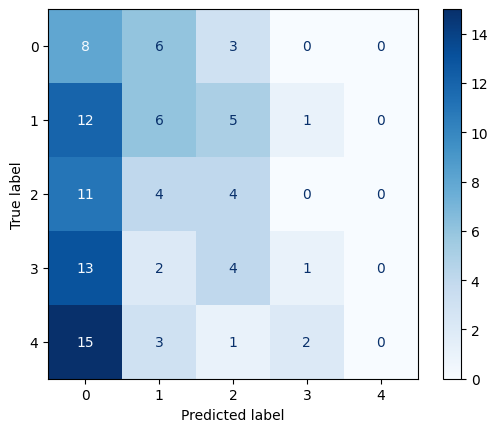

In [300]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [309]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf', 'linear']
}

In [310]:
grid_search = GridSearchCV(SVC(decision_function_shape='ovr', random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.30104938271604936


In [311]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy: 0.27722772277227725
Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.94      0.32        17
           2       0.75      0.25      0.38        24
           3       0.67      0.21      0.32        19
           4       0.50      0.05      0.09        20
           5       1.00      0.05      0.09        21

    accuracy                           0.28       101
   macro avg       0.62      0.30      0.24       101
weighted avg       0.64      0.28      0.24       101



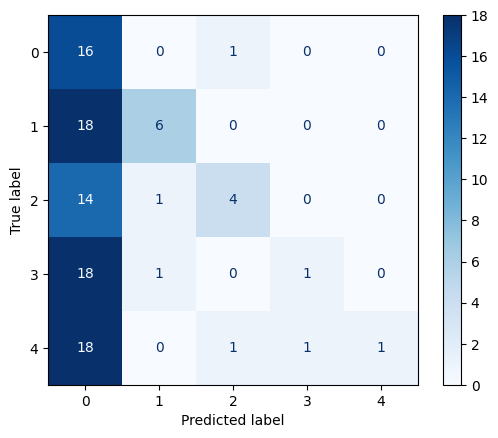

In [312]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot(cmap='Blues')